In [ ]:
!pip uninstall opencv-python -y
# downgrade OpenCV a bit since some none-free features are not avilable
!pip install opencv-contrib-python==3.4.2.17 --force-reinstall

  Using cached https://files.pythonhosted.org/packages/61/29/fc60b2de1713aa92946992544329f20ccb5e4ba26290f403e04b7da44105/opencv_contrib_python-3.4.2.17-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/14/32/d3fa649ad7ec0b82737b92fefd3c4dd376b0bb23730715124569f38f3a08/numpy-1.19.5-cp36-cp36m-manylinux2010_x86_64.whl
ERROR: imgaug 0.2.9 requires opencv-python, which is not installed.
ERROR: dopamine-rl 1.0.5 requires opencv-python>=3.4.1.15, which is not installed.
ERROR: albumentations 0.1.12 requires opencv-python, which is not installed.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Found existing installation: opencv-contrib-python 3.4.2.17
    Un

In [ ]:
#!wget "https://www.teahub.io/photos/full/162-1620234_deer-hd.jpg" -O avi.jpg
!wget "https://www.colorcombos.com/images/colors/FFFFFF.png" -O avi1.jpg
#img1=cv2.imread("avi.jpg")

--2021-02-16 07:07:09--  https://www.colorcombos.com/images/colors/FFFFFF.png
Resolving www.colorcombos.com (www.colorcombos.com)... 69.163.235.81
Connecting to www.colorcombos.com (www.colorcombos.com)|69.163.235.81|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [image/png]
Saving to: ‘avi1.jpg’

avi1.jpg                [ <=>                ]     344  --.-KB/s    in 0s      

2021-02-16 07:07:10 (14.0 MB/s) - ‘avi1.jpg’ saved [344]



#Importing Libraries

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from google.colab import drive

In [ ]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


#Loading image from google drive

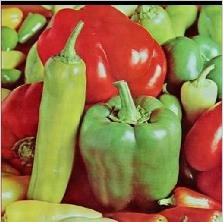

In [ ]:
img_path="/content/gdrive/MyDrive/First year/Second sem/Security and forenics 2/Assignment 1/AVADHESH CHAMOLA - Cover_2.jpg"
img=cv2.imread(img_path)
cv2_imshow(img)

#Encryption Function

In [ ]:
def encrypt(m_text):
    e,n=(997,299)
    x=""
    m=0
    for i in m_text:
        m=ord(i)
        c=(m**e)%n
        x+=(format(c, '09b')) 
    print("After RSA encryption your message will become- ",x)
    print("Now this encrypted message hide into LSB of given image")
    return x

#Decryption Function

In [ ]:
def decrypt(priv_key,c_text):
    d,n=priv_key
    x=''
    m=0
    c_words=[int(c_text[i: i+9],2) for i in range(0, len(c_text), 9)]
    for i in c_words:
        m=(i**d)%n
        c=chr(m)
        x+=c
        if x[-5:] == "$$$$$": 
            break
    return x

#Hide Data Function

In [ ]:
def hideData(image_orignal, secret_message):
    image=image_orignal.copy()
    n_bytes = image_orignal.shape[0] * image_orignal.shape[1] * 3 
    secret_message += "$$$$$"
    encrypted_secret_msg = encrypt(secret_message)
    if len(secret_message) > n_bytes:
        print("Error encountered insufficient bytes, need bigger image or less data !!")
        return
    data_index = 0
    data_len = len(encrypted_secret_msg)
    for values in image:
        for pixel in values:
            r, g, b = [format(i, "08b") for i in pixel]  
            
            if data_index < data_len:
                pixel[0] = int(r[:-1] + encrypted_secret_msg[data_index], 2)
                data_index += 1

            if data_index < data_len:
                pixel[1] = int(g[:-1] + encrypted_secret_msg[data_index], 2)
                data_index += 1

            if data_index < data_len:
                pixel[2] = int(b[:-1] + encrypted_secret_msg[data_index], 2)
                data_index += 1
                
            
            if data_index >= data_len:
                break
    return image

#PSNR Function

In [ ]:
 def PSNR(original, secretImage): 
    mse = np.mean((secretImage-original) ** 2) 
    if(mse == 0):  
        return 100
    max_pixel = 255.0
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse)) 
    return psnr 

#Retrive data Function

In [ ]:
def showData(priv_key,image):
    binary_data = ""
    for values in image:
        for pixel in values:
            r, g, b = [format(i, "08b") for i in pixel] 
            binary_data += r[-1] 
            binary_data += g[-1] 
            binary_data += b[-1] 
    x=decrypt(priv_key,binary_data)
    return x[:-5]

#User Interface
##Hiding encypted data into image 

******************************LSB Stenography with RSA Encryption*********************************

      ************************Hiding encypted data into image***************************      


Enter the message that you want to hide in image Sisters and Brothers of America,It fills my heart with joy unspeakable to rise in response to the warm and cordial welcome which you have given us. I thank you in the name of the most ancient order of monks in the world; I thank you in the name of the mother of religions, and I thank you in the name of millions and millions of Hindu people of all classes and sects.My thanks, also, to some of the speakers on this platform who, referring to the delegates from the Orient, have told you that these men from far-off nations may well claim the honor of bearing to different lands the idea of toleration. I am proud to belong to a religion which has taught the world both tolerance and universal acceptance. We believe not only in universal toleration, but

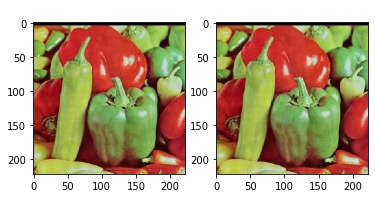

In [ ]:
print("******************************LSB Stenography with RSA Encryption*********************************")
print()
print("      ************************Hiding encypted data into image***************************      ")
print("\n")
message=input("Enter the message that you want to hide in image ")

print("You want to hide this message- '",message,"' into image")
print("leangth of message is- ",len(message))
image=cv2.imread(img_path)
#image=cv2.imread("avi1.jpg")
hiddenTextImg=hideData(image,message)
print("      ***********************************************************************************")
plt.axis('off')
plt.subplot(1,2,1)
image1=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image1)
plt.title('Original',color='white')
plt.subplot(1,2,2)
hiddenTextImg1=cv2.cvtColor(hiddenTextImg, cv2.COLOR_BGR2RGB)
plt.imshow(hiddenTextImg1)
plt.title('Hidden Text image',color='white')
print("PSNR value of hidden text image wrt orignal image is- ",PSNR(image,hiddenTextImg))

##Retrieving orignal data from stenographed image

In [ ]:
print("      ************************Retrieving orignal data from stenographed image***************************      ")
print()
print("For accessing hidden data please provide your private keys-")
d=int(input("Enter value of d-"))
n=int(input("Enter value of n-"))
priv_key=(d,n)
print("      *************************************************************************************************")
recoveredText=showData(priv_key,hiddenTextImg)
print("Recovered and decrypted Text from hidden text image-",recoveredText)
print()
print("      *********************************************END*************************************************")

      ************************Retrieving orignal data from stenographed image***************************      

For accessing hidden data please provide your private keys-
Enter value of d-85
Enter value of n-299
      *************************************************************************************************
Recovered and decrypted Text from hidden text image- Avadhesh

      *********************************************END*************************************************


In [ ]:
299